Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Nicolás Guarín-Zapata 2026.

# Mejor aproximación en espacios de funciones

En este notebook queremos extender el método de mínimos
cuadrados para aproximación en espacios de funciones.

In [1]:
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [4]:
sym.init_session()

IPython console for SymPy 1.14.0 (Python 3.11.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.14.0/



## Funciones útiles

In [5]:
def plot_expr(expr, x, rango=(0, 1), ax=None, linestyle="solid"):
    """Grafica expresiones de SymPy que dependen de una variable"""
    expr_num = lambdify(x, expr, "numpy")
    x0 = rango[0]
    x1 = rango[1]
    x_num = np.linspace(x0, x1, 301)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.plot(x_num, expr_num(x_num), linestyle=linestyle)

A continuación se muestra cómo usar esta función

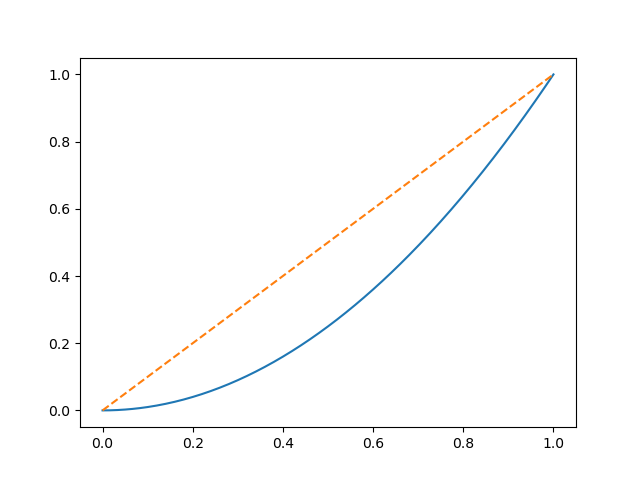

In [6]:
plt.figure()
ax = plt.gca()
plot_expr(x**2, x, ax=ax, rango=(0, 1))
plot_expr(x, x, ax=ax, rango=(0, 1), linestyle="dashed")

## 1. Mínimos cuadrados para espacios de funciones

In [7]:
def minimos_cuadrados(funcion, base, var, intervalo):
    n = len(base)
    c = sym.symbols("c0:%d" % n)
    span = 0
    for k in range(n):
        span = span + c[k] * base[k]

    e = funcion - span
    a, b = intervalo
    E = sym.integrate(e**2, (var, a, b))
    eqs = []
    for k in range(n):
        eqs.append(sym.diff(E, c[k]))

    sol = sym.solve(eqs, c)
    vals = list(sol.values())
    funcion_ap = 0
    for k in range(n):
        funcion_ap = funcion_ap + vals[k]*base[k]
    
    return funcion_ap

In [8]:
x = sym.symbols("x")
funcion = sym.sin(x)
base = (1, x, x**2, x**3)

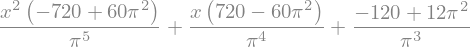

In [9]:
funcion_ap = minimos_cuadrados(funcion, base, x, (0, sym.pi))
funcion_ap

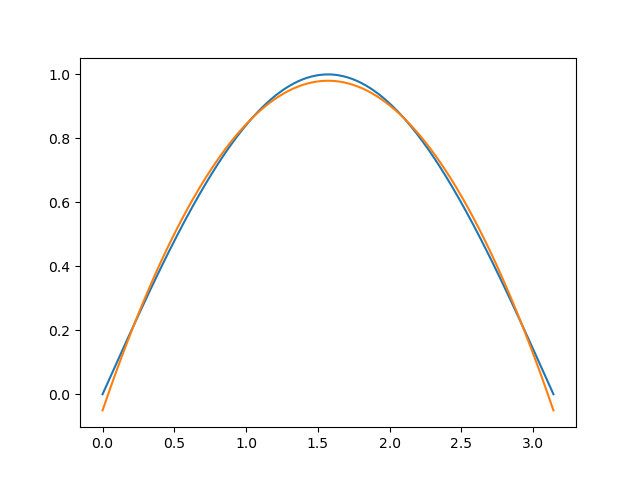

In [10]:
plt.figure()
ax = plt.gca()
plot_expr(funcion, x, (0, np.pi), ax=ax)
plot_expr(funcion_ap, x, (0, np.pi), ax=ax)

## 2. Aproximación de una parábola por senos

Dada la función $f(x) = 1 + 2x(1 - x)$ en [0, 1], queremos
encontrar una aproximación en el espacio de funciones

$$V = \mathrm{span}\{1, \sin(\pi x)\}\, .$$

**a)** Grafique $f(x)$. Vea si, de forma intuitiva, puede
adivinar los coeficientes de la expansión

$$u(x) = c_0 + c_1 \sin(\pi x)\, .$$

Calcule la norma $L_2$ del error

$$\Vert f - u\Vert = \sqrt{\int\limits_0^1 \left[f(x) - u(x)\right]^2 \mathrm{d}x}\, .$$

In [11]:
# Agregue acá sus respuestas

**b)** Calcule los coeficientes usando el método de mínimos cuadrados.

In [12]:
# Agregue acá sus respuestas

## 3. Aproximación de la función exponencial a través de potencias

Sea $V$ un espacio de funciones con funciones base

$$x^k,\quad k=0, 1, \dots, N\, .$$

Encuentre la mejor aproximación $f(x) = \exp(-x)$ en [0, 5]
entre rodas las funciones en $V$ para $N= 2, 4, 6$. Ilustre
las aproximaciones en 3 gráficos separados.

**Ayuda:** Use las funciones ``minimos_cuadrados`` y
``plot_expr``.

In [13]:
# Agregue acá su código